In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")

This is the repository path:  c:\Users\Davide\Git\pypsa-africa
Had to go 1 folder(s) up.


<AxesSubplot:>

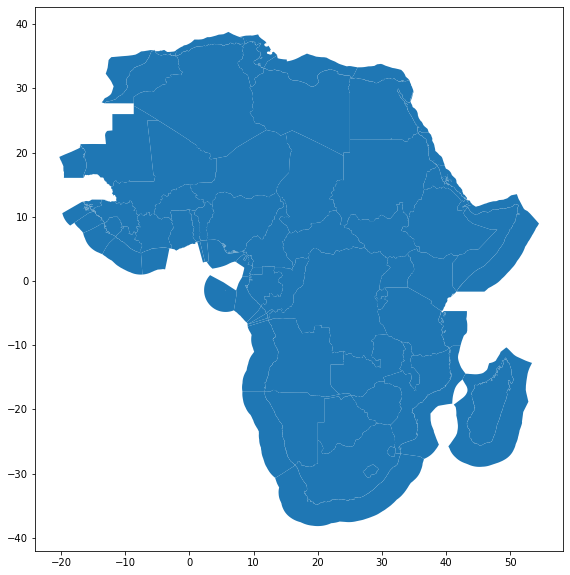

In [24]:
continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')
off_shore_old = gpd.read_file('resources/offshore_shapes_old.geojson')
gadm = gpd.read_file('resources/gadm_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)

In [26]:
off_shore_old

,name,geometry
0,MG,"POLYGON ((53.36642 -12.75650, 53.29761 -12.891..."
1,ZA,"POLYGON ((36.53069 -27.71605, 36.52361 -27.746..."
2,NA,"POLYGON ((11.78965 -17.27214, 11.78547 -17.270..."
3,CG,"POLYGON ((12.00958 -5.03015, 9.12111 -6.73441,..."
4,AO,"MULTIPOLYGON (((13.42086 -5.87340, 13.39728 -5..."
5,MZ,"POLYGON ((32.73596 -25.82699, 32.73315 -25.808..."
6,KE,"POLYGON ((45.94520 -1.65401, 45.92500 -1.66925..."
7,TZ,"POLYGON ((43.21518 -4.68341, 43.21730 -4.71457..."
8,CD,"POLYGON ((13.43198 -5.85955, 13.42861 -5.85964..."
9,SL,"POLYGON ((-11.44519 6.93907, -11.44627 6.93828..."


<AxesSubplot:>

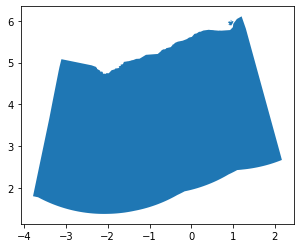

In [20]:
off_shore2 = off_shore[off_shore.name == "GH"]
off_shore2.plot()

In [17]:
off_shore

,name,geometry
0,AO,"MULTIPOLYGON (((11.73945 -17.24576, 11.73218 -..."
1,BJ,"POLYGON ((2.82397 5.44567, 2.98419 3.57678, 2...."
2,CD,"MULTIPOLYGON (((12.36291 -6.05293, 11.97954 -6..."
3,CG,"POLYGON ((9.12111 -6.73441, 9.12096 -6.73445, ..."
4,CI,"POLYGON ((-3.15500 4.89417, -3.17639 4.79306, ..."
5,CM,"POLYGON ((9.80293 2.35654, 9.80043 2.35945, 9...."
6,DJ,"MULTIPOLYGON (((43.28262 12.65285, 43.28811 12..."
7,DZ,"POLYGON ((7.81355 38.00945, 7.81667 38.01000, ..."
8,EG,"MULTIPOLYGON (((33.01483 32.85797, 33.27509 32..."
9,ER,"MULTIPOLYGON (((39.75733 17.95804, 39.76019 17..."


<AxesSubplot:>

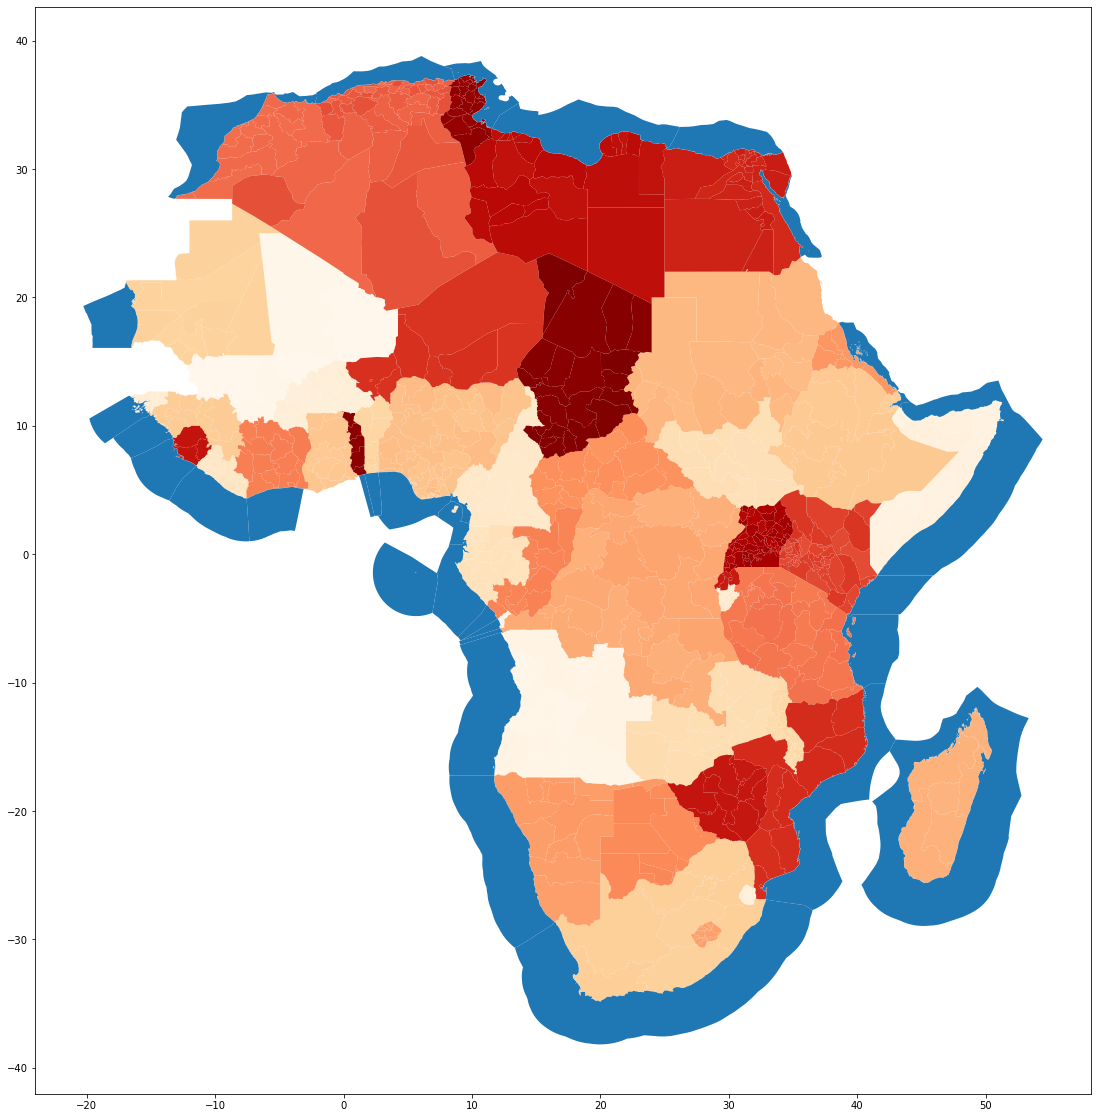

In [18]:
ax2= gadm.plot(cmap='OrRd', figsize=(20, 20), legend=True) #column="pop", 
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_pop.pdf")

<AxesSubplot:>

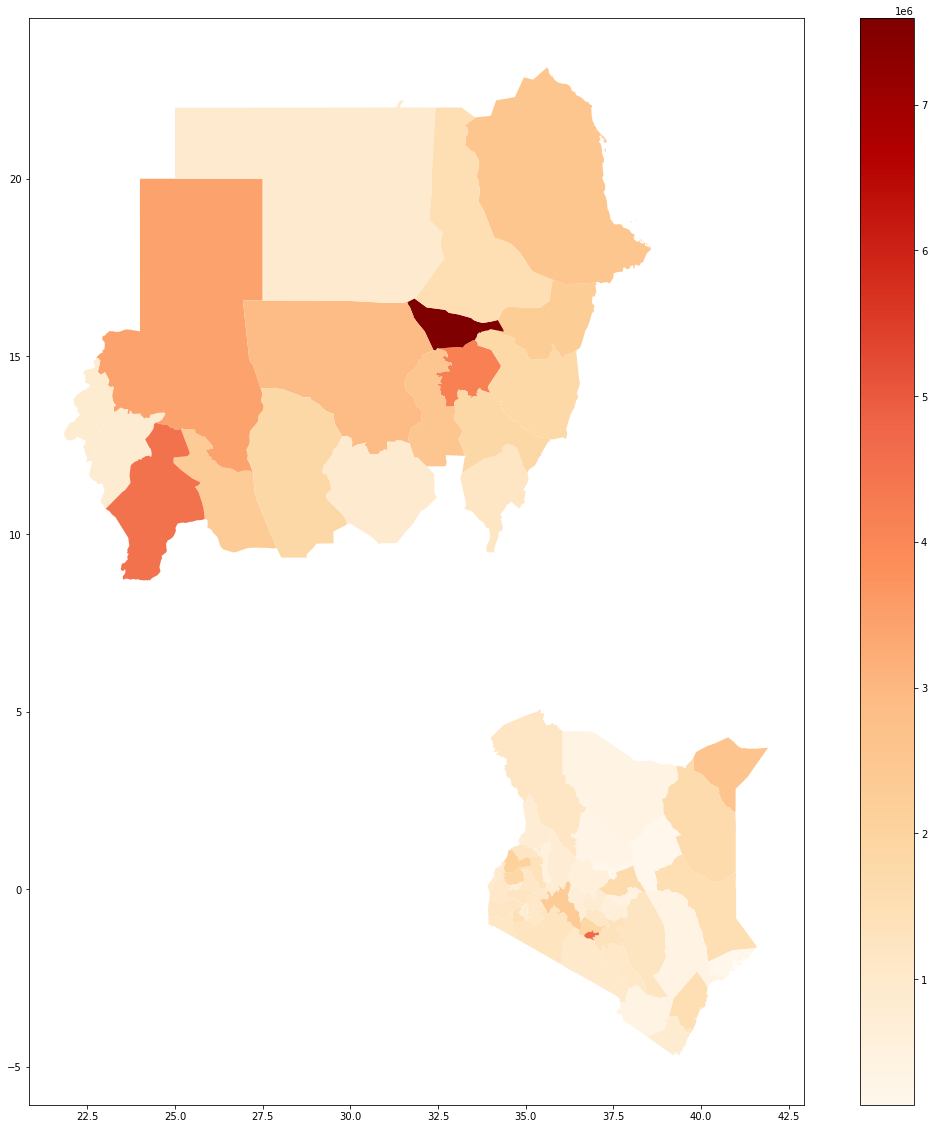

In [ ]:
ax3= gadm.plot(column="pop", cmap='OrRd', figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_gdp.pdf")

In [ ]:
gadm[gadm["country"]=="KE"]

,GADM_ID,country,pop,gdp,geometry
18,KEN.1_1,KE,7.756523e+05,1.679452e+09,"POLYGON ((35.84734 -0.07654, 35.82207 -0.11243..."
19,KEN.2_1,KE,1.073746e+06,2.209688e+09,"POLYGON ((35.26193 -1.01562, 35.24075 -1.03093..."
20,KEN.3_1,KE,2.062140e+06,4.313464e+09,"POLYGON ((34.45476 0.47293, 34.38872 0.47563, ..."
21,KEN.4_1,KE,9.410409e+05,3.209494e+09,"POLYGON ((34.24632 0.31446, 34.23613 0.29631, ..."
22,KEN.5_1,KE,5.012387e+05,1.137823e+09,"POLYGON ((35.58806 0.17453, 35.56785 0.20298, ..."
23,KEN.6_1,KE,6.381259e+05,1.787284e+09,"POLYGON ((37.46395 -0.73364, 37.47382 -0.72407..."
24,KEN.7_1,KE,1.525806e+06,8.613858e+08,"POLYGON ((40.43329 -1.93512, 40.21291 -2.03973..."
25,KEN.8_1,KE,1.169692e+06,2.735929e+09,"POLYGON ((34.48337 -0.79247, 34.46432 -0.85891..."
26,KEN.9_1,KE,1.914950e+05,6.232438e+08,"POLYGON ((38.56964 -0.01509, 38.54852 -0.01971..."
27,KEN.10_1,KE,9.891349e+05,5.917967e+09,"POLYGON ((37.87513 -3.03994, 37.87073 -3.07751..."


In [ ]:
gadm[gadm.country=="ET"].sum()

C:\Users\Davide\AppData\Local\Temp/ipykernel_14808/1474304111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gadm[gadm.country=="ET"].sum()


GADM_ID    0.0
country    0.0
pop        0.0
gdp        0.0
dtype: float64

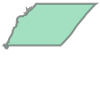

In [ ]:
g1 = off_shore.loc[0, "geometry"]
g2 = off_shore.loc[1, "geometry"]
g3 = g1.union(g2)
g3

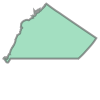

In [ ]:
g1

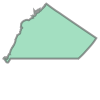

In [ ]:
g2

In [ ]:
off_shore2 = off_shore.copy()
off_shore2 = off_shore2[off_shore2.name =="KE"]

<AxesSubplot:>

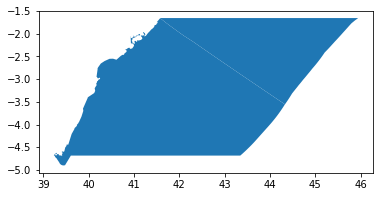

In [ ]:
off_shore2.plot()

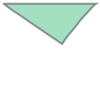

In [ ]:
off_shore2.loc[1, "geometry"]

In [ ]:
(off_shore.name == "MA").sum()

1

TO DROP:  Int64Index([2, 3], dtype='int64')


C:\ProgramData\Miniconda3\envs\toast\lib\site-packages\numpy\core\fromnumeric.py:3162: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return asarray(a).ndim
C:\ProgramData\Miniconda3\envs\toast\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


<AxesSubplot:>

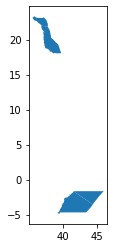

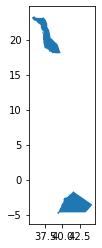

In [ ]:
ret_df = off_shore.copy()
off_shore.plot()

for c_code in ["SD", "KE"]:
    selection = (ret_df.name == c_code)
    n_offshore_shapes = selection.sum()

    if n_offshore_shapes > 1:
        # when multiple shapes per country, then merge polygons
        
        geom = ret_df[selection].geometry.unary_union
        print("TO DROP: ", ret_df[selection].index)
        ret_df.drop(ret_df[selection].index, inplace=True)
        ret_df.iloc[-1] = [c_code, geom]
ret_df.plot()
        

In [ ]:
ret_df

,name,geometry
0,KE,"POLYGON ((41.61002 -1.68240, 41.70832 -1.75987..."
1,SD,"MULTIPOLYGON (((38.32727 18.27296, 38.32803 18..."
